In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
import torch_geometric.transforms as T
from torch_geometric.datasets.dblp import DBLP
import matplotlib.pyplot as plt

## DBLP

In [2]:
dataset = DBLP(root='./dblp_data', transform=T.Constant(node_types='conference'))
data = dataset[0]
author = data['author'].x.tolist()
df = pd.DataFrame(author)
df['class'] = data['author'].y.tolist()

### Feature selection from Bag-of-Words features of Author node using most frequent occurences

In [3]:
def get_selected_features(X):
    col_sum = X.sum(axis=0)
    sorted_colsum = sorted(col_sum, reverse=True)[:8]

    colsum_df = pd.DataFrame(col_sum)
    index_list = list(np.ravel(colsum_df[colsum_df[0].isin(sorted_colsum)].index))

    imp_feat = X[index_list]
   
    return imp_feat

In [4]:
# Feature selection for Author class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)
X = class0
imp_feat0 = get_selected_features(class0)
imp_feat0.head()

,23,63,64,65,221,222,295,296
15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [5]:
# Feature selection for Author class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)
X = class1
imp_feat1 = get_selected_features(class1)
imp_feat1.head()

,23,35,39,63,88,152,170,321
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
23,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Feature selection for Author class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)
X = class2
imp_feat2 = get_selected_features(class2)
imp_feat2.head()

,15,23,148,152,172,228,295,321
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Feature selection for Author class 3
class3 = df[df['class'] == 3].drop(['class'], axis=1)
X = class3
imp_feat3 = get_selected_features(class3)
imp_feat3.head()

,23,135,222,242,253,302,321,329
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
20,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Features of each class of Author node sampled using Diffusion Models

In [8]:
class_path = '../../../../../../graph generator/diffusion models/sampled_features_diffusion/dependence/DiTabDDPM/dblp/frequency/'

In [9]:
sampled0  = pd.DataFrame(torch.load(class_path + 'author0_8feat.pt').cpu().numpy())
sampled0.head()

,0,1,2,3,4,5,6,7
0,0,1,0,1,0,0,0,0
1,1,1,1,0,0,1,1,0
2,1,1,0,0,1,0,1,0
3,1,0,0,1,0,1,1,1
4,1,0,1,1,1,0,1,1


In [10]:
sampled1  = pd.DataFrame(torch.load(class_path + 'author1_8feat.pt').cpu().numpy())
sampled1.head()

,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,1,0
1,0,0,1,1,0,0,0,0
2,0,1,1,0,0,0,0,1
3,1,0,0,0,0,0,0,1
4,1,1,1,1,1,0,1,0


In [11]:
sampled2  = pd.DataFrame(torch.load(class_path + 'author2_8feat.pt').cpu().numpy())
sampled2.head()

,0,1,2,3,4,5,6,7
0,1,0,0,0,0,0,1,0
1,1,1,0,1,1,0,0,0
2,0,1,0,0,1,1,1,1
3,0,0,0,1,0,0,1,1
4,1,0,1,1,0,1,0,0


In [12]:
sampled3  = pd.DataFrame(torch.load(class_path + 'author3_8feat.pt').cpu().numpy())
sampled3.head()

,0,1,2,3,4,5,6,7
0,1,0,1,0,0,1,1,0
1,0,1,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,1


In [13]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Author class 0

In [14]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.70710678, 0.        , 0.        , ..., 0.        , 0.40824829,
        0.        ],
       [0.5       , 0.63245553, 0.70710678, ..., 0.40824829, 0.57735027,
        0.        ],
       [0.5       , 0.31622777, 0.35355339, ..., 0.40824829, 0.57735027,
        0.40824829],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
sns.set(font_scale=1.4)

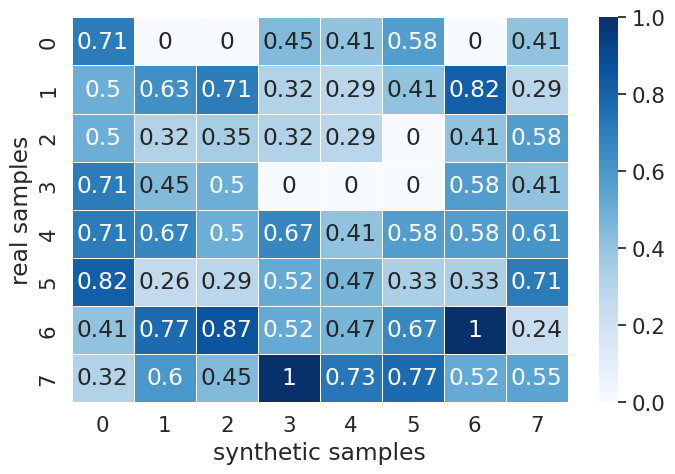

In [16]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [17]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.32445740839682463

Author class 1

In [18]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57735027, 0.81649658, 0.33333333, ..., 0.28867513, 0.        ,
        0.28867513],
       ...,
       [0.        , 1.        , 0.40824829, ..., 0.35355339, 0.        ,
        0.        ],
       [0.        , 0.70710678, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

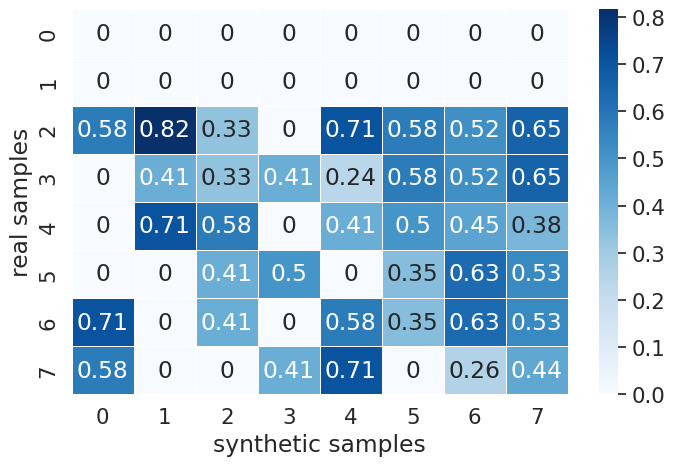

In [19]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [20]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.33876553082524324

Author class 2

In [21]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35355339, 0.63245553, ..., 0.40824829, 0.        ,
        0.        ],
       [0.31622777, 0.67082039, 0.8       , ..., 0.77459667, 0.25819889,
        0.4472136 ],
       ...,
       [0.        , 0.5       , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 0.5       , 0.4472136 , ..., 0.57735027, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

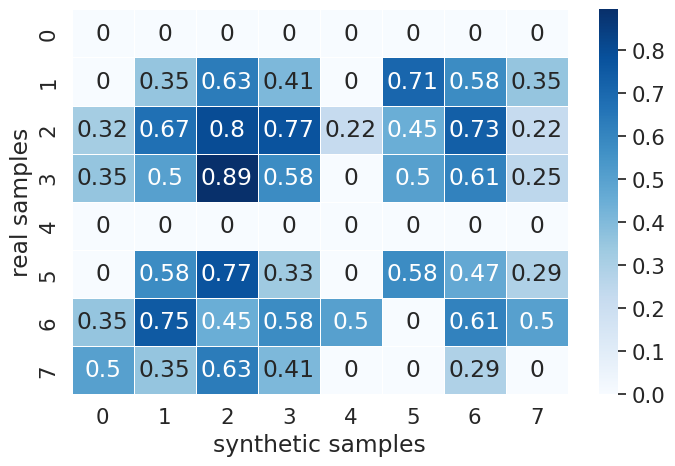

In [22]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [23]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.2337417447704533

Author class 3

In [24]:
real_class3 = np.array(imp_feat3)
cosine_sim(real_class3,sampled3)

array([[0.        , 0.57735027, 0.70710678, ..., 0.57735027, 0.57735027,
        0.        ],
       [0.28867513, 0.33333333, 0.40824829, ..., 0.33333333, 0.        ,
        0.40824829],
       [0.28867513, 0.66666667, 0.40824829, ..., 0.33333333, 0.33333333,
        0.81649658],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

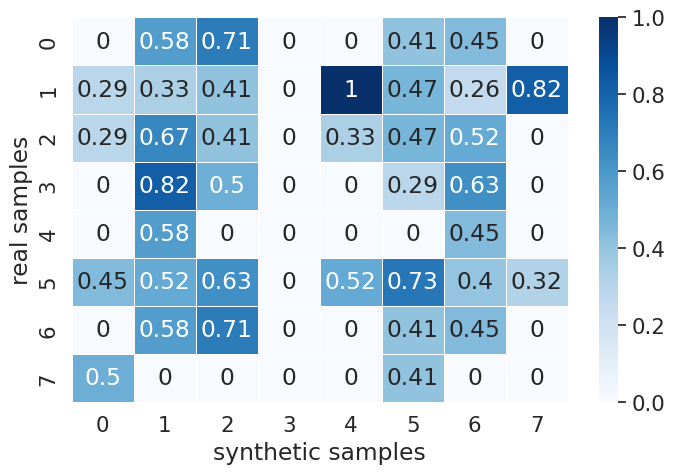

In [25]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class3[:8],sampled3[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [26]:
avg_cossim_class3 = np.mean(cosine_sim(real_class3,sampled3))
avg_cossim_class3

0.29699908573334455

In [27]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2 + avg_cossim_class3)/4

0.29849094243146645